In [128]:

!pip install google-api-python-client
!pip install googleapiclient.discovery
!pip install IPython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config.config import YOUTUBE_API_KEY
from googleapiclient.discovery import build
from IPython.display import JSON


ERROR: Could not find a version that satisfies the requirement googleapiclient.discovery (from versions: none)
ERROR: No matching distribution found for googleapiclient.discovery


In [129]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=YOUTUBE_API_KEY)


In [130]:
channel_ids = [
    'UCtatfZMf-8EkIwASXM4ts0A',
    'UC8butISFwT-Wl7EV0hUK0BQ',
    'UC7cs8q-gJRlGwj4A8OmCmXg',
    'UCtYLUTtgS3k1Fg4y5tAhLbw',
    'UCKQdc0-Targ4nDIAUrlfKiA',
    
]

In [131]:
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=",".join(channel_ids)
)
response = request.execute()

print(response)


{'kind': 'youtube#channelListResponse', 'etag': 'ig7kpZyHt8nd6zhp7WOYNgaKQRs', 'pageInfo': {'totalResults': 5, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'QeDbzMwXLhVjw8oAzowj1MczcFo', 'id': 'UC7cs8q-gJRlGwj4A8OmCmXg', 'snippet': {'title': 'Alex The Analyst', 'description': 'My name is Alex Freberg and on this channel I will be going over everything you need to know to become a Data Analyst. If you are wanting to make a career change or learn the skills needed to become a Data Analyst, be sure to subscribe to stay up to date on all my latest content.\n\nYou can find me on LinkedIn at:\nhttps://www.linkedin.com/in/alex-freberg/\n\nAlexTheAnalyst.com\nhttps://www.alextheanalyst.com/\n\nDiscord Channel:\nhttps://discord.gg/rxZUjNvRzR\n\nTwitter:\n@Alex_TheAnalyst\n\n', 'customUrl': '@alextheanalyst', 'publishedAt': '2020-01-08T05:04:24.970712Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AIdro_l9wLnClpLKJeVmP5XwHy4NF_Gu13GfyRT1WTZDaSYS-g=s88-c-k-

In [132]:
JSON(response)

<IPython.core.display.JSON object>

In [133]:
channel_data = []
for item in response.get("items", []):
    channel_info = {
        "title": item["snippet"].get("title"),
        "description": item["snippet"].get("description"),
        "customUrl": item["snippet"].get("customUrl"),
        "country": item["snippet"].get("country"),
        "viewCount": item["statistics"].get("viewCount"),
        "subscriberCount": item["statistics"].get("subscriberCount"),
        "videoCount": item["statistics"].get("videoCount"),
        "publishedAt": item["snippet"].get("publishedAt"),
    }
    channel_data.append(channel_info)

for channel in channel_data:
    print(channel)

{'title': 'Alex The Analyst', 'description': 'My name is Alex Freberg and on this channel I will be going over everything you need to know to become a Data Analyst. If you are wanting to make a career change or learn the skills needed to become a Data Analyst, be sure to subscribe to stay up to date on all my latest content.\n\nYou can find me on LinkedIn at:\nhttps://www.linkedin.com/in/alex-freberg/\n\nAlexTheAnalyst.com\nhttps://www.alextheanalyst.com/\n\nDiscord Channel:\nhttps://discord.gg/rxZUjNvRzR\n\nTwitter:\n@Alex_TheAnalyst\n\n', 'customUrl': '@alextheanalyst', 'country': 'US', 'viewCount': '49351804', 'subscriberCount': '1050000', 'videoCount': '360', 'publishedAt': '2020-01-08T05:04:24.970712Z'}
{'title': 'StatQuest with Josh Starmer', 'description': "Statistics, Machine Learning and Data Science can sometimes seem like very scary topics, but since each technique is really just a combination of small and simple steps, they are actually quite simple. My goal with StatQuest 

In [134]:
df = pd.DataFrame(channel_data)
df

,title,description,customUrl,country,viewCount,subscriberCount,videoCount,publishedAt
0,Alex The Analyst,My name is Alex Freberg and on this channel I ...,@alextheanalyst,US,49351804,1050000,360,2020-01-08T05:04:24.970712Z
1,StatQuest with Josh Starmer,"Statistics, Machine Learning and Data Science ...",@statquest,US,78849816,1410000,291,2011-05-24T01:52:48Z
2,AssemblyAI,"Welcome to the AssemblyAI YouTube channel, whe...",@assemblyai,US,14407388,166000,362,2020-08-31T18:36:35.725854Z
3,freeCodeCamp.org,Learn to code for free.,@freecodecamp,US,860076971,10700000,1850,2014-12-16T21:18:48Z
4,Python Simplified,Hi everyone! My name is Mariya and I'm a softw...,@pythonsimplified,CA,11414909,256000,193,2019-01-25T00:48:09Z


In [140]:
df.isnull().sum()

title              0
description        0
customUrl          0
country            0
viewCount          0
subscriberCount    0
videoCount         0
publishedAt        0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            5 non-null      object
 1   description      5 non-null      object
 2   customUrl        5 non-null      object
 3   country          5 non-null      object
 4   viewCount        5 non-null      object
 5   subscriberCount  5 non-null      object
 6   videoCount       5 non-null      object
 7   publishedAt      5 non-null      object
dtypes: object(8)
memory usage: 452.0+ bytes


In [136]:
df['viewCount'] = df['viewCount'].astype(int)
df['subscriberCount'] = df['subscriberCount'].astype(int)
df['videoCount'] = df['videoCount'].astype(int)

In [137]:
df['publishedAt']

0    2020-01-08T05:04:24.970712Z
1           2011-05-24T01:52:48Z
2    2020-08-31T18:36:35.725854Z
3           2014-12-16T21:18:48Z
4           2019-01-25T00:48:09Z
Name: publishedAt, dtype: object

In [138]:
df['publishedAt'] = df['publishedAt'].str.slice(0, 10)

In [139]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt']

0   2020-01-08
1   2011-05-24
2   2020-08-31
3   2014-12-16
4   2019-01-25
Name: publishedAt, dtype: datetime64[ns]

([], [])

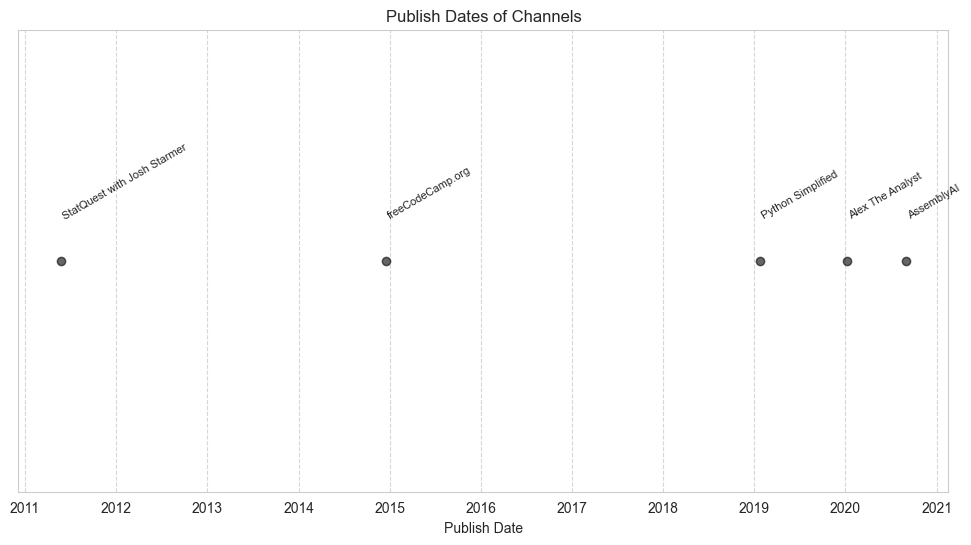

In [171]:
plt.figure(figsize=(12, 6))
plt.scatter(df['publishedAt'], [1]*len(df), alpha=0.6, color='black')

for i, row in df.iterrows():
    plt.text(row['publishedAt'], 1.01, str(row['title']), rotation=30, fontsize=8, ha='left')


plt.title('Publish Dates of Channels')
plt.xlabel('Publish Date')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.yticks([])

In [141]:
df_sorted_subscribers = df.sort_values(by='subscriberCount', ascending=False)
df_sorted_subscribers[['title', 'subscriberCount']]

,title,subscriberCount
3,freeCodeCamp.org,10700000
1,StatQuest with Josh Starmer,1410000
0,Alex The Analyst,1050000
4,Python Simplified,256000
2,AssemblyAI,166000


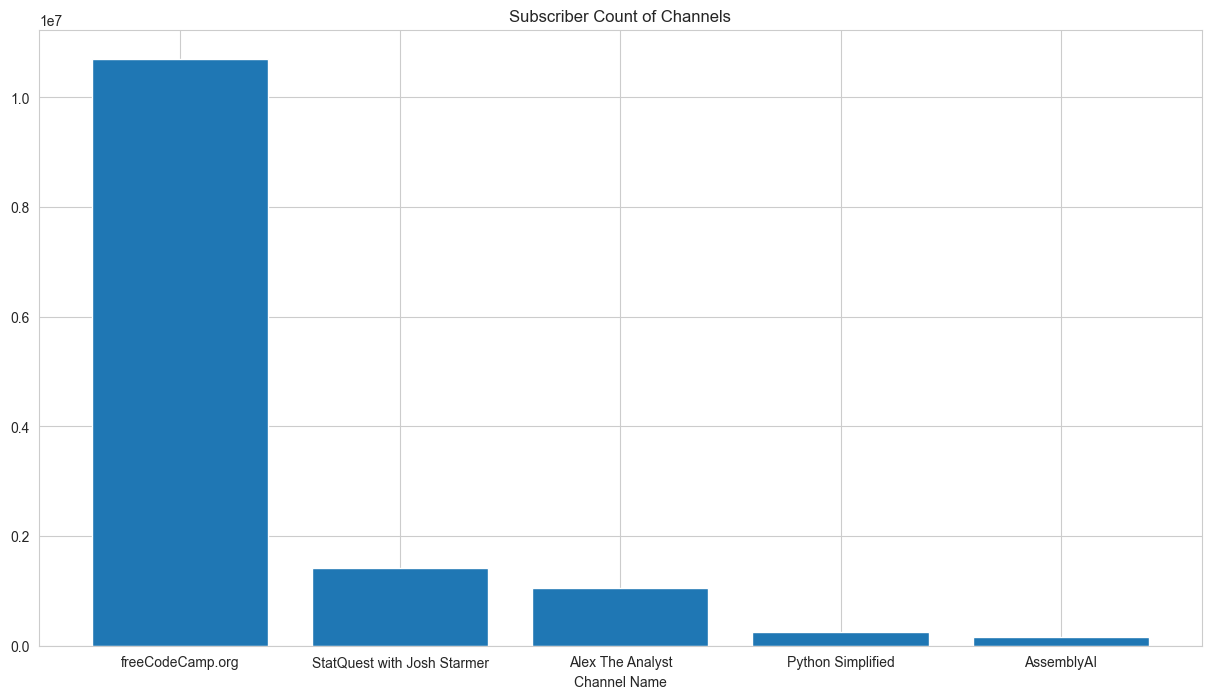

In [142]:
plt.figure(figsize=[15,8])
plt.bar(df_sorted_subscribers['title'], df_sorted_subscribers['subscriberCount'], data=df_sorted_subscribers)
plt.title("Subscriber Count of Channels")
plt.xlabel("Channel Name");

In [143]:
df_sorted_views = df.sort_values(by='viewCount', ascending=False)
df_sorted_views[['title', 'viewCount']]

,title,viewCount
3,freeCodeCamp.org,860076971
1,StatQuest with Josh Starmer,78849816
0,Alex The Analyst,49351804
2,AssemblyAI,14407388
4,Python Simplified,11414909


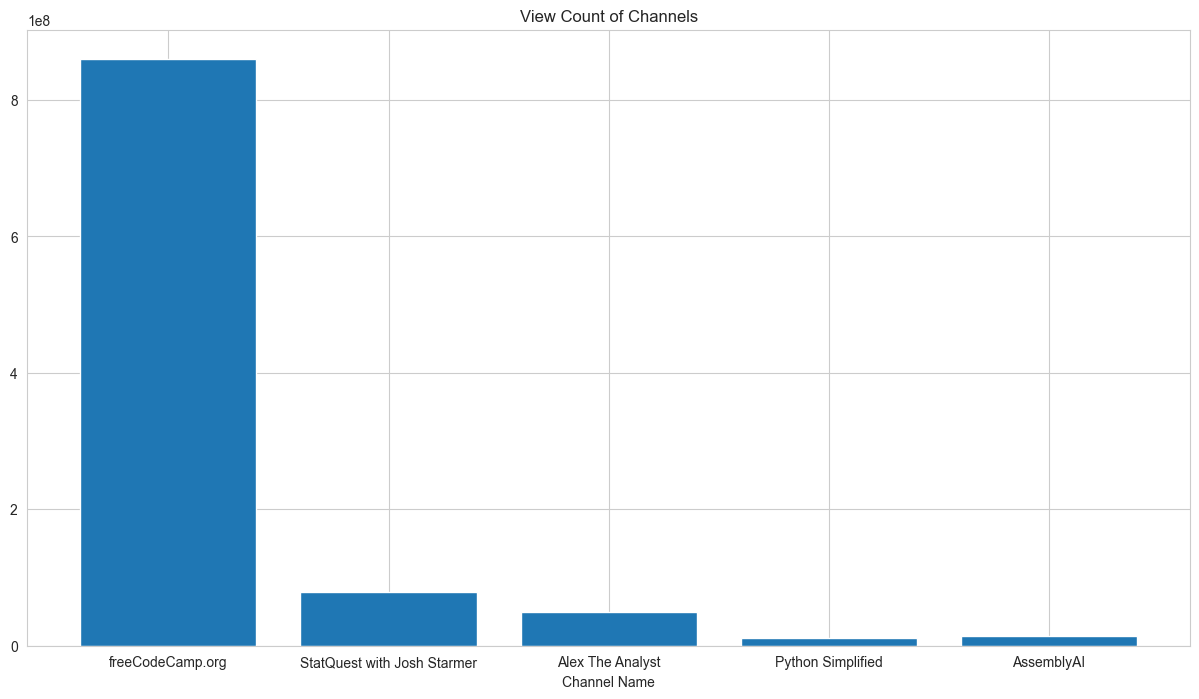

In [144]:
plt.figure(figsize=[15,8])
plt.bar(df_sorted_subscribers['title'], df_sorted_subscribers['viewCount'], data=df_sorted_views)
plt.title("View Count of Channels")
plt.xlabel("Channel Name");

In [145]:
df_sorted_videos = df.sort_values(by='videoCount', ascending=False)
df_sorted_videos[['title', 'videoCount']].head()

,title,videoCount
3,freeCodeCamp.org,1850
2,AssemblyAI,362
0,Alex The Analyst,360
1,StatQuest with Josh Starmer,291
4,Python Simplified,193


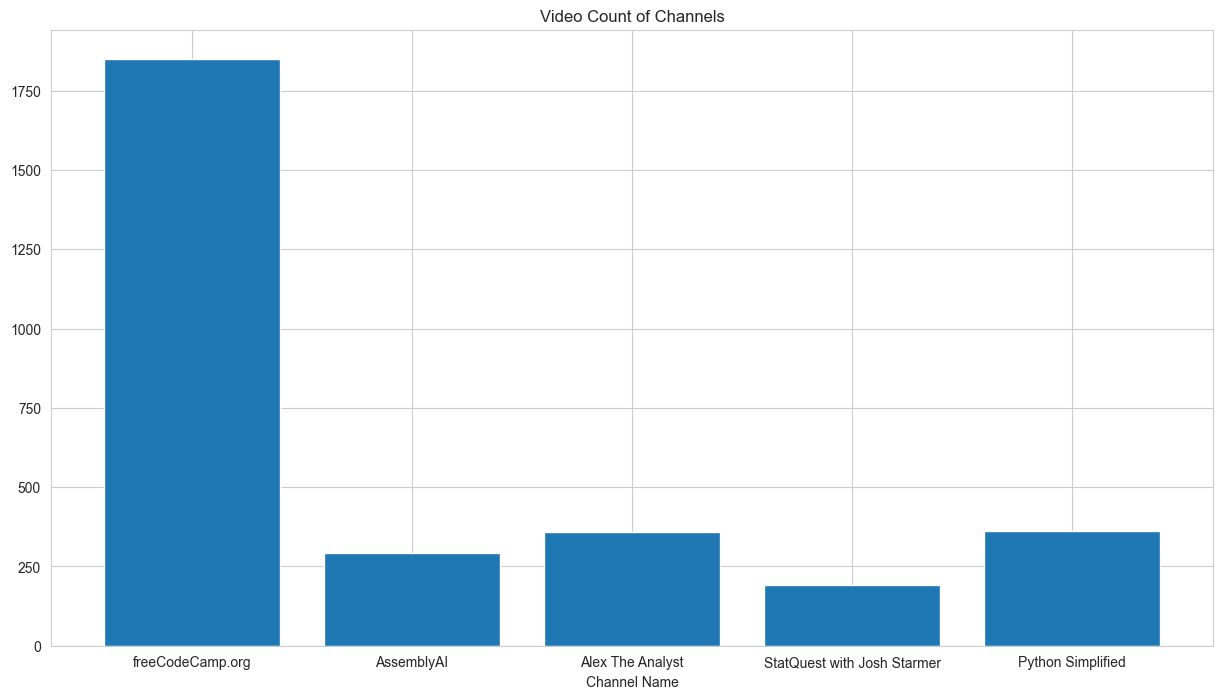

In [146]:
plt.figure(figsize=[15,8])
plt.bar(df_sorted_videos['title'], df_sorted_subscribers['videoCount'], data=df_sorted_videos)
plt.title("Video Count of Channels")
plt.xlabel("Channel Name");

In [147]:
df_country_distribution = pd.DataFrame(df['country'].value_counts())
df_country_distribution

,count
country,
US,4
CA,1


([<matplotlib.patches.Wedge at 0x29ec05f2a90>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'US'),
  Text(0.8899187482945414, -0.6465637025335375, 'CA')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

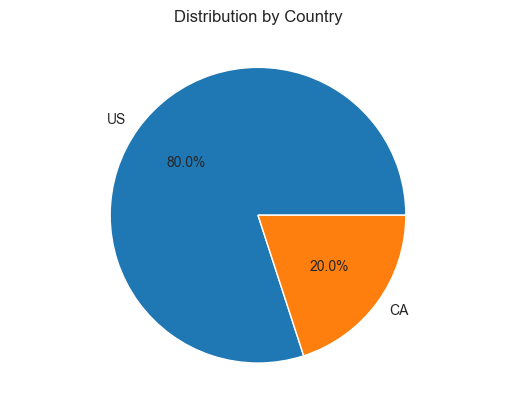

In [148]:
sns.set_style("whitegrid")
plt.title('Distribution by Country')
plt.axis('equal')
plt.pie(df_country_distribution['count'], labels=df_country_distribution.index, autopct='%1.1f%%')



In [149]:
df.corr(numeric_only=True)

,viewCount,subscriberCount,videoCount
viewCount,1.000000,0.998978,0.993936
subscriberCount,0.998978,1.000000,0.990559
videoCount,0.993936,0.990559,1.000000


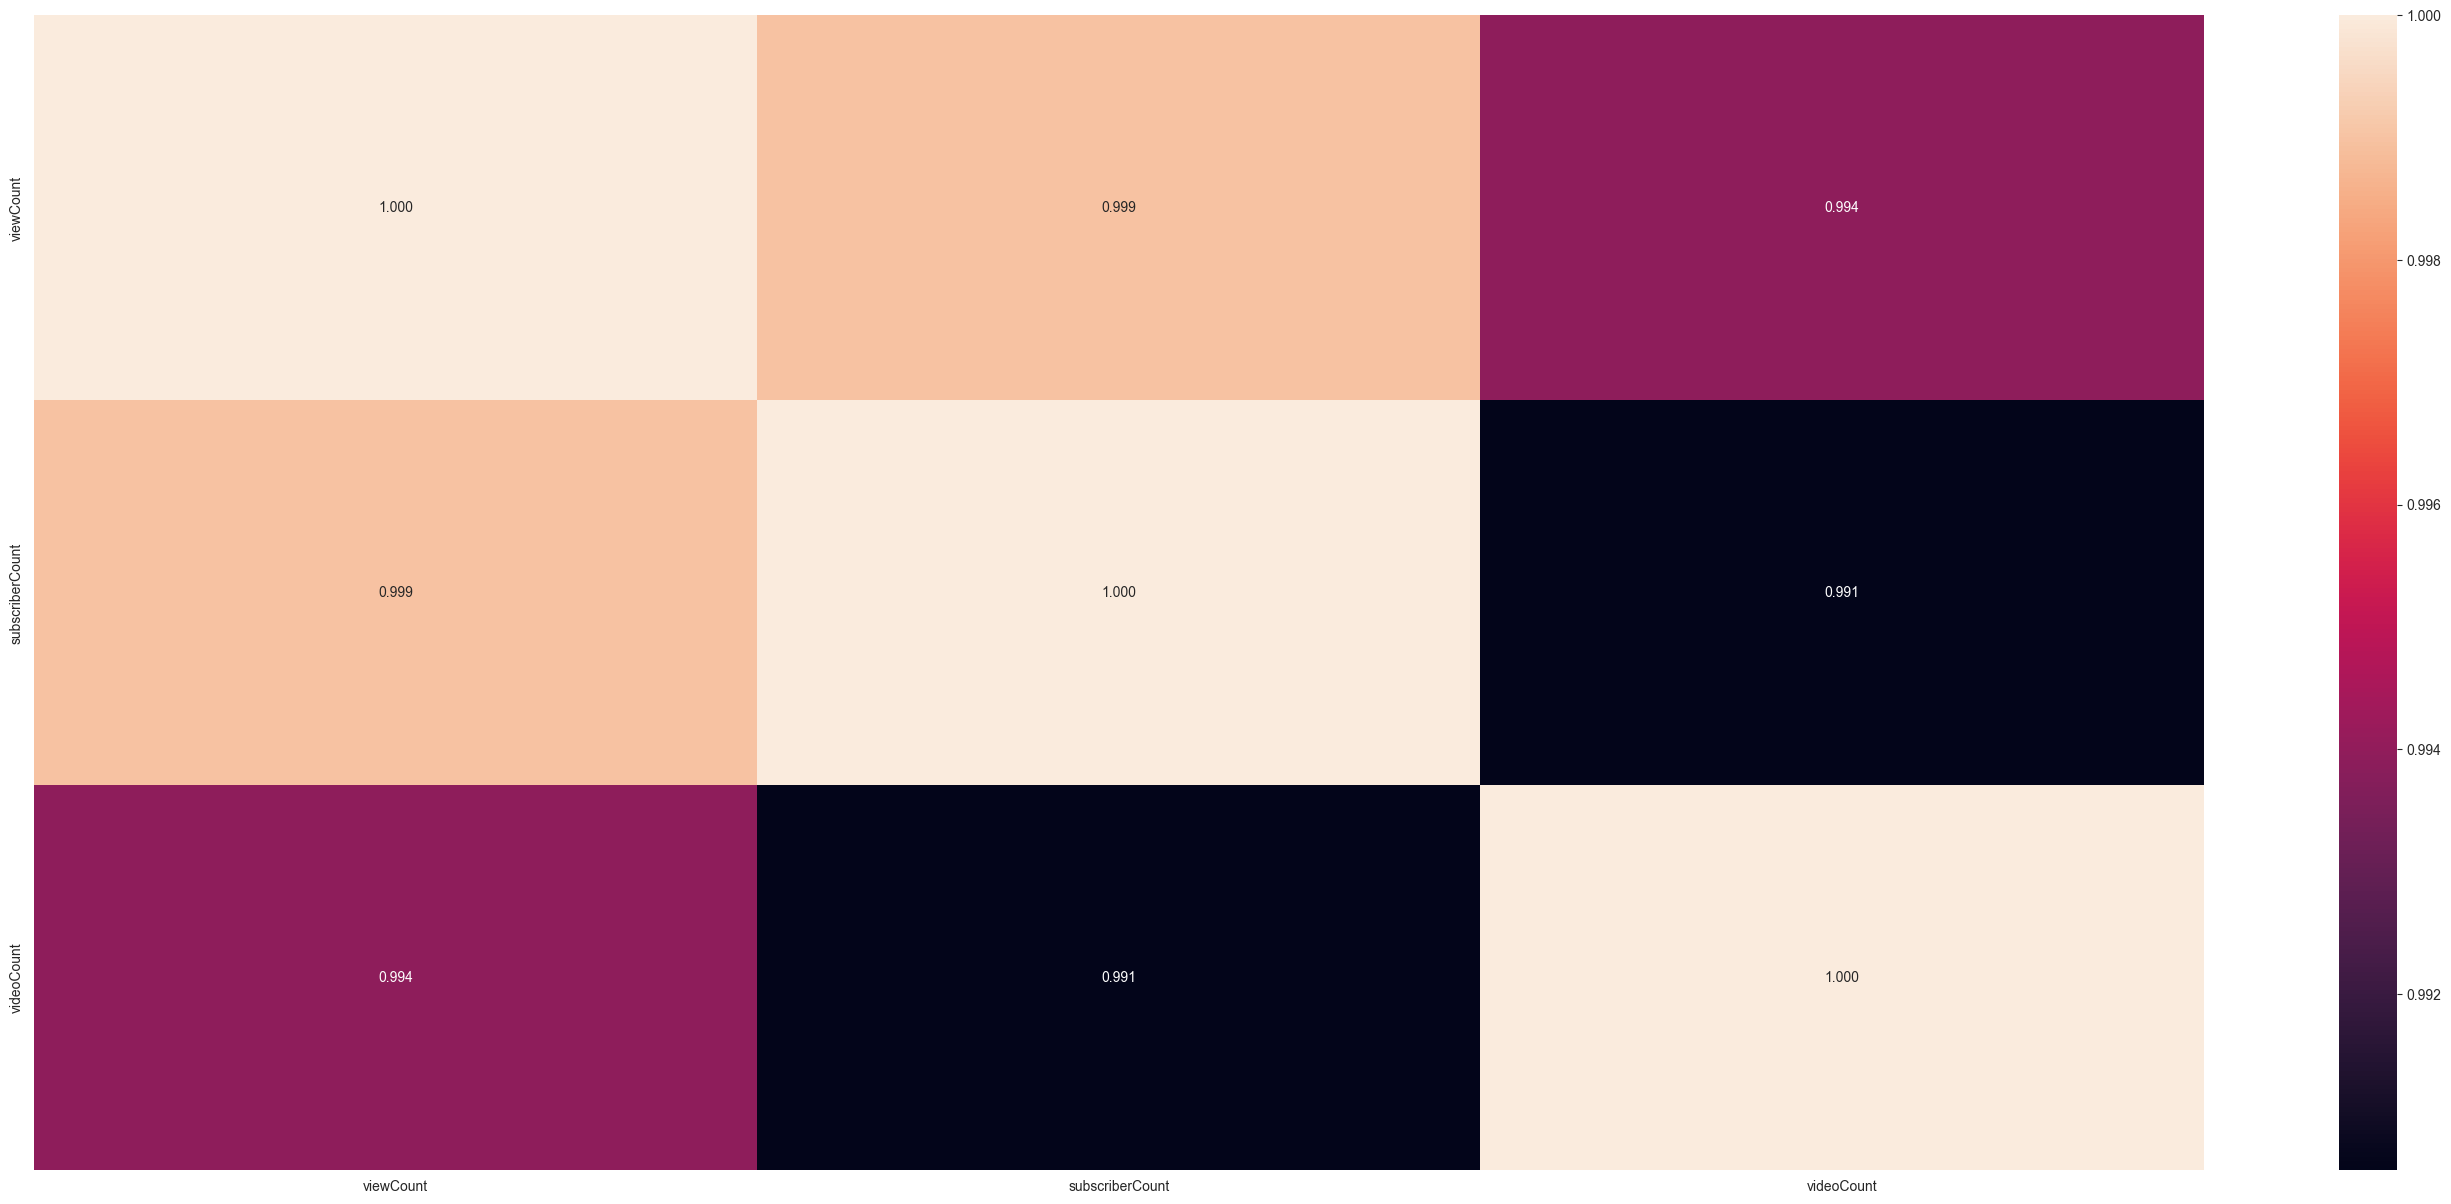

In [150]:
plt.figure(figsize=[35,15])
sns.heatmap(df.corr(numeric_only=True), annot=True,  vmax=1, fmt='.3f');

In [151]:
!pip install wordcloud
from wordcloud import WordCloud

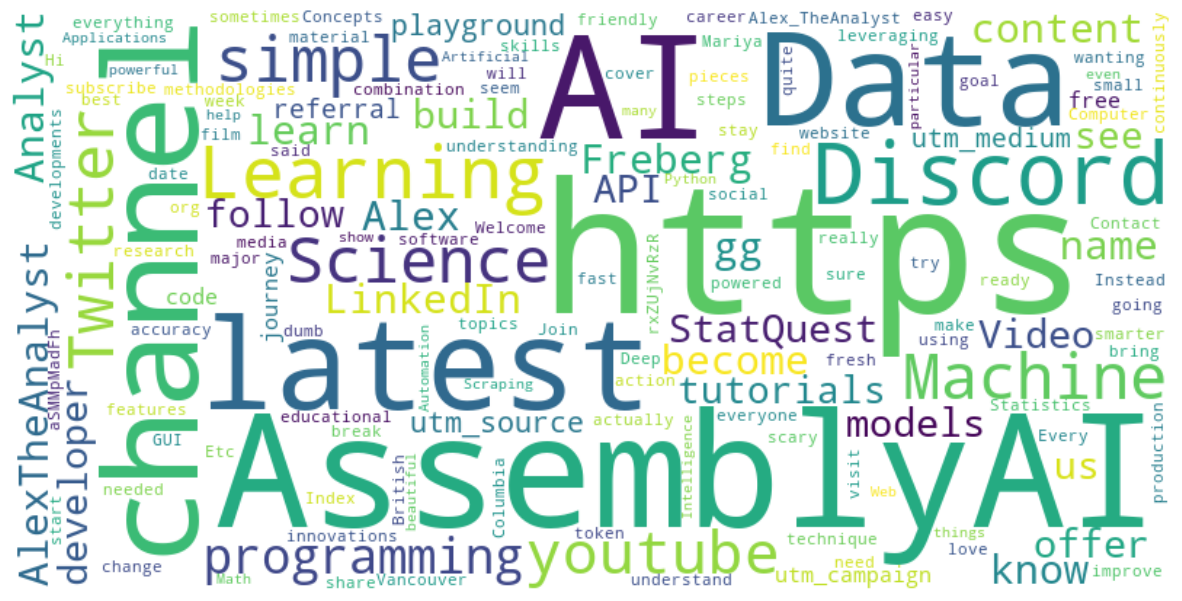

In [152]:
text = ' '.join(df['description'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()